In [82]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline
fibdataset = open('../datasets/Average_length_trimmed_sorted.fib')

In [83]:
# Prints size of the database used
entries = str(sum(1 for _ in fibdataset))
fibdataset.seek(0)
print "Number entries used for analysis: " + entries

Number entries used for analysis: 1607424


In [84]:
# Returns number of strides in a name
def getStrides(name, strideLen):
    curLen = 0
    strideCount = 0
    for char in name:
        if (curLen >= strideLen):
            strideCount += 1
            curLen = 1
            print ""
            print char,
        elif (char == '/'):
            strideCount+=1
            print ""
            print char,
            curLen = 1
        else:
            curLen += 1
            print char,
    return strideCount+1

Currently using this approach:
com/google/news/2017/07

**breaks into**
**com** <->
**/go** <-> 
**ogl** <-> 
**e** <->
**/ne** <->
**ws** <->
**/20** <->
**17** <->
**/07**

In [85]:
getStrides("com/google/news/2017/07", 3)

c o m 
/ g o 
o g l 
e 
/ n e 
w s 
/ 2 0 
1 7 
/ 0 7

9

In [86]:
# Returns number of strides in a name
def getNumberOfStrides(name, strideLen):
    curLen = 0
    strideCount = 0
    for char in name:
        if (curLen >= strideLen):
            strideCount += 1
            curLen = 1
        elif (char == '/'):
            strideCount+=1
            curLen = 1
        else:
            curLen += 1
    return strideCount+1

In [87]:
# Expected: com /go ogl e /ne ws /20 17 /07 :: 9
print getNumberOfStrides("com/google/news/2017/07", 3)
# Expected: com /bi ng/ map s /ro ork ee :: 8
print getNumberOfStrides("com/bing/maps/roorkee", 3)

9
8


In [88]:
maxLen = 0
for line in fibdataset:
    curLen = getNumberOfStrides(line, 3)
    if curLen > maxLen:
        maxLen = curLen
fibdataset.seek(0)
print maxLen

33


In [89]:
arr = [0]*maxLen

In [90]:
for line in fibdataset:
    curLen = getNumberOfStrides(line, 3)
    arr[curLen-1] += 1
fibdataset.seek(0)
print maxLen

33


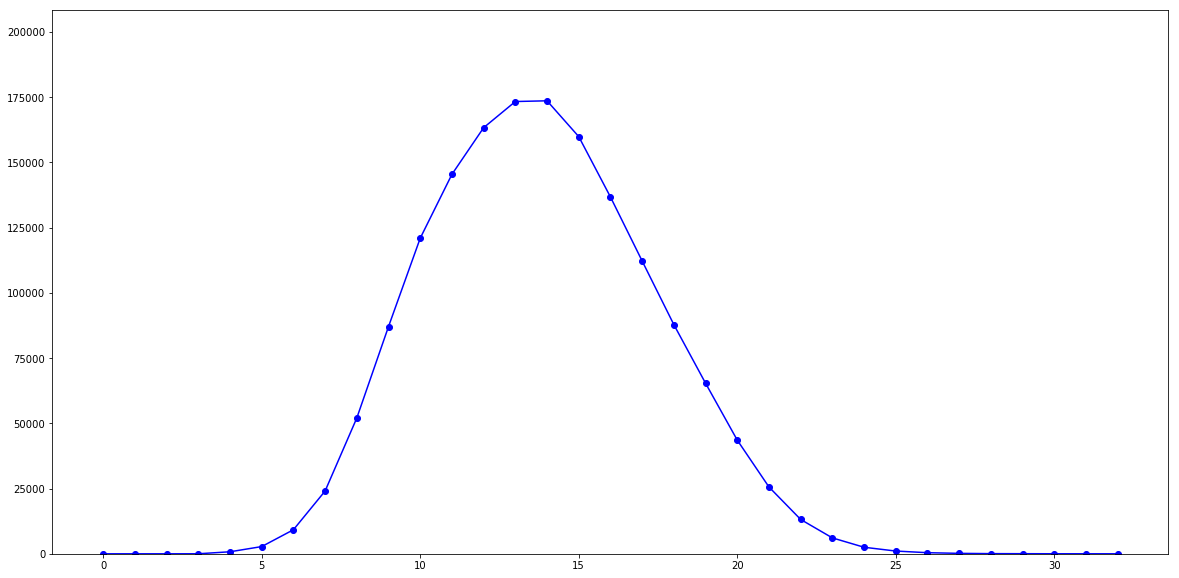

In [91]:
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_ylim(0, max(arr) * 1.2)

plt.plot(arr, 'b-o')

plt.show()